# Latihan SKLearn SVR

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
salary_df = pd.read_csv('Salary_Data.csv')
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
# Split data atrributes into X and y
X = salary_df['YearsExperience']
y = salary_df['Salary']

# Mengubah bentuk data X
X = np.array(X)
X = X[:, np.newaxis] # Mengubah bentuk data X menjadi 2D

In [6]:
# Model SVR parameter C, gamma, kernel
svr = SVR(C=1000, gamma=0.05, kernel='rbf')

# Training model
svr.fit(X, y)

SVR(C=1000, gamma=0.05)

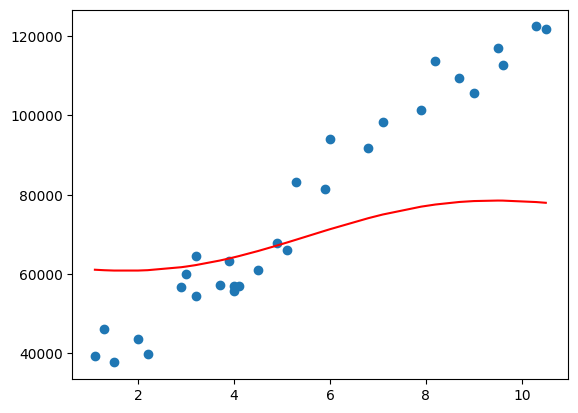

In [7]:
# Plot
plt.scatter(X, y)
plt.plot(X, svr.predict(X), color='red')

## Coba Grid Search untuk parameter

In [8]:
from sklearn.model_selection import GridSearchCV

model_grid = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

grid_search = GridSearchCV(model_grid, parameters)

In [9]:
# Training model
grid_search.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [10]:
# Best parameter
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [11]:
# New model
svr_new = SVR(C=100000, gamma=0.005, kernel='rbf')
svr_new.fit(X, y)

SVR(C=100000, gamma=0.005)

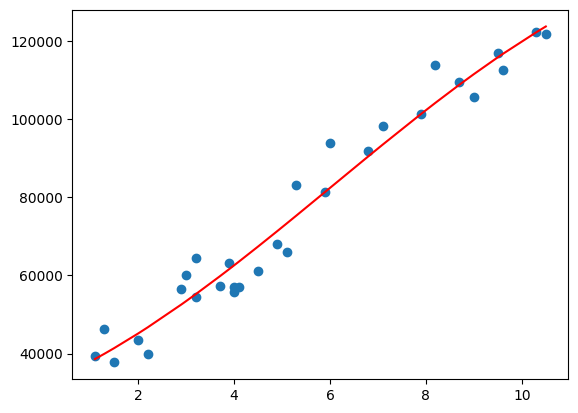

In [12]:
# Plot
plt.scatter(X, y)
plt.plot(X, svr_new.predict(X), color='red')